In [3]:
import torch
import torch.nn as nn

import matplotlib.pyplot as plt

import numpy as np


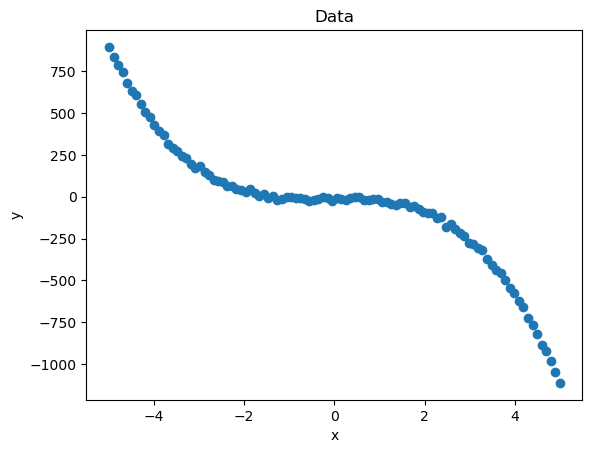

In [4]:

# Set the random seed for reproducibility
np.random.seed(42)

# Generate x-values
x = np.linspace(-5, 5, 100)

# Generate y-values with noise
y = -8*x**3 - 4*x**2 + 0.1*x - 10 + np.random.normal(0, 10, size=len(x))

# Reshape the arrays to match the expected input shape of the neural network
x = x.reshape(-1, 1)
y = y.reshape(-1, 1)

# display the data

plt.scatter(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Data')
plt.show()



In [5]:
len(x)

100

In [22]:


# Define the polynomial network
class PolynomialNetwork(nn.Module):
    def __init__(self):
        super(PolynomialNetwork, self).__init__()
        # Define the parameters of the polynomial with differnet powers from 1 to 3
        
        self.w1 = nn.Parameter(torch.randn(1, requires_grad=True))
        self.w2 = nn.Parameter(torch.randn(1, requires_grad=True))
        self.w3 = nn.Parameter(torch.randn(1, requires_grad=True))
        self.b = nn.Parameter(torch.randn(1, requires_grad=True))
        

    def forward(self, x):
        # print(f"x.shape {x.shape}")
        # print(f"x2 is {x**2}")
        # print(f"x is {x}")
        return  self.w1 * x**3 * self.w2 * x**2 + self.w3 * x + self.b
    
    def __str__(self) -> str:
        return f"w1: {self.w1}, w2: {self.w2}, w3: {self.w3}, b: {self.b}"

# Create an instance of the polynomial network
network = PolynomialNetwork()


In [27]:

# Set the number of epochs and batch size
num_epochs = 1000
batch_size = 20

# Convert the numpy arrays to PyTorch tensors
x_tensor = torch.from_numpy(x).float()
y_tensor = torch.from_numpy(y).float()

# Create a DataLoader to handle batching of the data
dataset = torch.utils.data.TensorDataset(x_tensor, y_tensor)
dataloader = torch.utils.data.DataLoader(dataset, batch_size=batch_size, shuffle=True)

# Define the loss function and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.AdamW(network.parameters(), lr=0.01)

# Training loop
for epoch in range(num_epochs):
    total_loss = 0.0
    total_correct = 0
    
    for batch_x, batch_y in dataloader:
        # Forward pass
        outputs = network(batch_x)

        # print(f"output {outputs}")
        loss = criterion(outputs, batch_y)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        # Calculate total loss and accuracy
        total_loss += loss.item() * batch_x.size(0)
        total_correct += torch.sum(torch.abs(outputs - batch_y) < 1.0).item()
    
    # Calculate average loss and accuracy for the epoch
    avg_loss = total_loss / len(dataset)
    accuracy = total_correct / len(dataset)
    
    # Print the epoch number, loss, and accuracy
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss:.4f}, Accuracy: {accuracy:.4f}")


Epoch [1/1000], Loss: 2570.3592, Accuracy: 0.0200
Epoch [2/1000], Loss: 2444.6256, Accuracy: 0.0200
Epoch [3/1000], Loss: 2576.3751, Accuracy: 0.0300
Epoch [4/1000], Loss: 2422.2192, Accuracy: 0.0200
Epoch [5/1000], Loss: 2425.3972, Accuracy: 0.0200
Epoch [6/1000], Loss: 2408.2925, Accuracy: 0.0200
Epoch [7/1000], Loss: 2500.2076, Accuracy: 0.0400
Epoch [8/1000], Loss: 2396.9181, Accuracy: 0.0300
Epoch [9/1000], Loss: 2453.5289, Accuracy: 0.0200
Epoch [10/1000], Loss: 2495.8744, Accuracy: 0.0200
Epoch [11/1000], Loss: 2467.7100, Accuracy: 0.0300
Epoch [12/1000], Loss: 2388.4251, Accuracy: 0.0200
Epoch [13/1000], Loss: 2396.1810, Accuracy: 0.0200
Epoch [14/1000], Loss: 2483.1117, Accuracy: 0.0200
Epoch [15/1000], Loss: 2443.8110, Accuracy: 0.0200
Epoch [16/1000], Loss: 2403.9228, Accuracy: 0.0300
Epoch [17/1000], Loss: 2437.7752, Accuracy: 0.0200
Epoch [18/1000], Loss: 2421.2876, Accuracy: 0.0300
Epoch [19/1000], Loss: 2417.9647, Accuracy: 0.0200
Epoch [20/1000], Loss: 2423.3060, Accura

In [28]:
# print model parameters
print(network)


w1: Parameter containing:
tensor([-0.5708], requires_grad=True), w2: Parameter containing:
tensor([0.5048], requires_grad=True), w3: Parameter containing:
tensor([-40.2800], requires_grad=True), b: Parameter containing:
tensor([-40.7651], requires_grad=True)


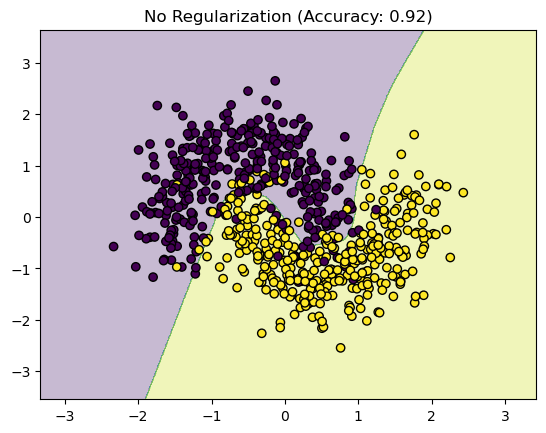

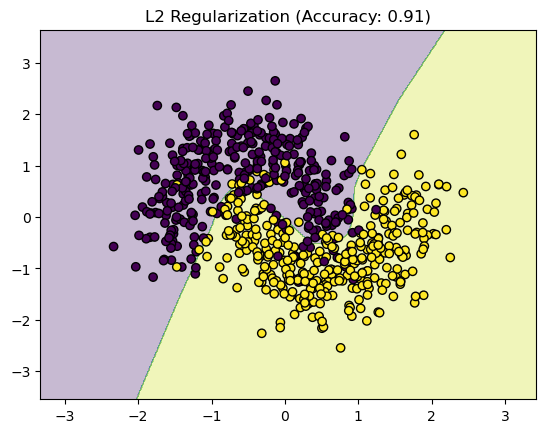

Accuracy without regularization: 0.92
Accuracy with L2 regularization: 0.91


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

# Generate a synthetic dataset
X, y = make_moons(n_samples=1000, noise=0.3, random_state=42)

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train a neural network without regularization
nn_no_reg = MLPClassifier(hidden_layer_sizes=(10, 10), max_iter=1000, random_state=42)
nn_no_reg.fit(X_train, y_train)
y_pred_no_reg = nn_no_reg.predict(X_test)
accuracy_no_reg = accuracy_score(y_test, y_pred_no_reg)

# Train a neural network with L2 regularization
nn_l2_reg = MLPClassifier(hidden_layer_sizes=(10, 10), alpha=0.01, max_iter=1000, random_state=42)
nn_l2_reg.fit(X_train, y_train)
y_pred_l2_reg = nn_l2_reg.predict(X_test)
accuracy_l2_reg = accuracy_score(y_test, y_pred_l2_reg)

# Plot decision boundaries
def plot_decision_boundary(model, X, y, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', marker='o')
    plt.title(title)
    plt.show()

# Visualize the decision boundaries
plot_decision_boundary(nn_no_reg, X_train, y_train, f'No Regularization (Accuracy: {accuracy_no_reg:.2f})')
plot_decision_boundary(nn_l2_reg, X_train, y_train, f'L2 Regularization (Accuracy: {accuracy_l2_reg:.2f})')

print(f'Accuracy without regularization: {accuracy_no_reg:.2f}')
print(f'Accuracy with L2 regularization: {accuracy_l2_reg:.2f}')


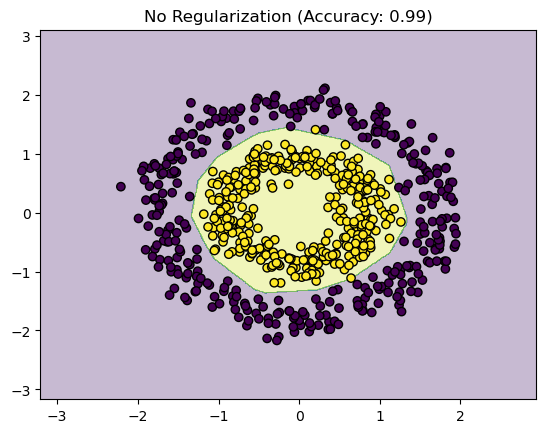

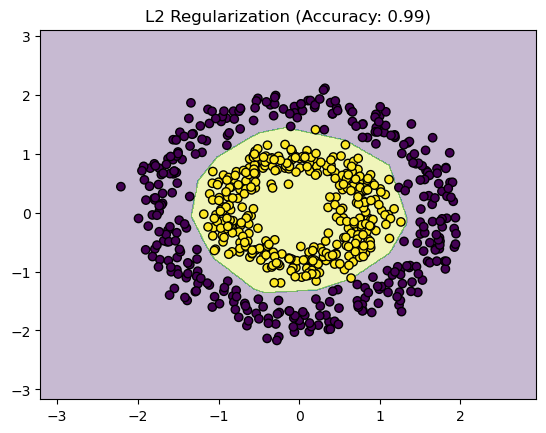

Accuracy without regularization: 0.99
Accuracy with L2 regularization: 0.99


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

# Generate a synthetic dataset with concentric circles
X, y = make_circles(n_samples=1000, factor=0.5, noise=0.1, random_state=42)

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train a neural network without regularization
nn_no_reg = MLPClassifier(hidden_layer_sizes=(10, 10), max_iter=1000, random_state=42)
nn_no_reg.fit(X_train, y_train)
y_pred_no_reg = nn_no_reg.predict(X_test)
accuracy_no_reg = accuracy_score(y_test, y_pred_no_reg)

# Train a neural network with L2 regularization
nn_l2_reg = MLPClassifier(hidden_layer_sizes=(10, 10), alpha=0.01, max_iter=1000, random_state=42)
nn_l2_reg.fit(X_train, y_train)
y_pred_l2_reg = nn_l2_reg.predict(X_test)
accuracy_l2_reg = accuracy_score(y_test, y_pred_l2_reg)

# Plot decision boundaries
def plot_decision_boundary(model, X, y, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', marker='o')
    plt.title(title)
    plt.show()

# Visualize the decision boundaries
plot_decision_boundary(nn_no_reg, X_train, y_train, f'No Regularization (Accuracy: {accuracy_no_reg:.2f})')
plot_decision_boundary(nn_l2_reg, X_train, y_train, f'L2 Regularization (Accuracy: {accuracy_l2_reg:.2f})')

print(f'Accuracy without regularization: {accuracy_no_reg:.2f}')
print(f'Accuracy with L2 regularization: {accuracy_l2_reg:.2f}')


In [ ]:
f